# Things to do!

+ Use Multiclass Dataset and use one-hot encoding on it.
+ Provide data set desc.
+ Normalize the data using minmax
+ Divide dataset into train and test and check for bias and variance.
+ Compare your model with logistic regression
+ Tune Hyperparameters and do analysis on it.

# Package imports

In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

import L_layer_nn as lnn

# Dataset Init

In [58]:
from sklearn.datasets import fetch_covtype
dataset = pd.read_csv("covtype.data")

In [60]:
dataset.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [12]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

# Generate random permutation of the dataset
idx = np.random.permutation(X.shape[0])
X, Y = X[idx], Y[idx]

#Normalize the dataset
X = X.T
X = (X-np.min(X, axis=1, keepdims = True))/(np.max(X, axis=1, keepdims = True)-np.min(X, axis = 1, keepdims = True))
print(X.shape)

(30, 569)


In [13]:
shape_X = X.shape
Y = Y.reshape(1,Y.shape[0])
shape_Y = Y.shape
m = X.shape[1]  # training set size

# Type: numpy array, validate using function type(X), type(Y)
print ('The shape of X(Features) is: ' + str(shape_X))
print ('The shape of Y(Target values) is: ' + str(shape_Y))
print ('Number of training examples:', m)

The shape of X(Features) is: (30, 569)
The shape of Y(Target values) is: (1, 569)
Number of training examples: 569


# 2-layer Neural Network

# Training

Cost after iteration 100: 0.693146
Cost after iteration 200: 0.660568
Cost after iteration 300: 0.660315
Cost after iteration 400: 0.660310
Cost after iteration 500: 0.660307
Cost after iteration 600: 0.660304
Cost after iteration 700: 0.660299
Cost after iteration 800: 0.660293
Cost after iteration 900: 0.660283
Cost after iteration 1000: 0.660268
Cost after iteration 1100: 0.660242
Cost after iteration 1200: 0.660194
Cost after iteration 1300: 0.660096
Cost after iteration 1400: 0.659860
Cost after iteration 1500: 0.659136
Cost after iteration 1600: 0.655697
Cost after iteration 1700: 0.615212
Cost after iteration 1800: 0.303504
Cost after iteration 1900: 0.158795
Cost after iteration 2000: 0.111014
Cost after iteration 2100: 0.089559
Cost after iteration 2200: 0.078161
Cost after iteration 2300: 0.071352
Cost after iteration 2400: 0.066822
Cost after iteration 2500: 0.063526
Cost after iteration 2600: 0.060960
Cost after iteration 2700: 0.058858
Cost after iteration 2800: 0.057078
C

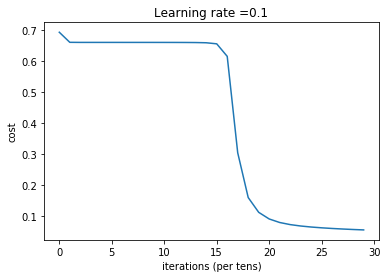

In [50]:
#Dimensions of each layer in our network
layer_dims = [X.shape[0],12,10,Y.shape[0]]
activation_functions = ["relu","relu","sigmoid"]
alpha = 0.1
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000, print_cost=True, print_plot =  True)

# Predictions and Accuracy

In [51]:
activations = ["relu","relu","sigmoid"]
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


In [52]:
activations = ["tanh","tanh","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 93%


In [53]:
activations = ["relu","tanh","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 97%


In [54]:
activations = ["tanh","relu","sigmoid"]
parameters = lnn.L_layer_model(X, Y, layer_dims, activation_functions, learning_rate = alpha, num_iterations = 3000)
predictions = lnn.predict(parameters, X, activations)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 97%
